# 【問題1】データの取得

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
iris = load_iris() # irisデータの読み込み

#X = pd.DataFrame(iris.data, columns=iris.feature_names) # インデックス付きの2次元データ（データフレーム）で取得
X = pd.DataFrame(iris.data) # インデックス付きの2次元データ（データフレーム）で取得
X = X.rename(columns={0:'sepal_length', 1:'sepal_width', 2:'petal_length', 3:'petal_width'})
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y = pd.DataFrame(iris.target) # インデックス付きの2次元データ（データフレーム）で取得
y = y.rename(columns={0:'Species'}) # 項目名を「Species」に変更
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


# 【問題2】データの結合

In [4]:
df = pd.concat([X, y], axis=1) # データの結合
#df.head()

# 【問題3】データの確認

In [5]:
# 先頭から4番目までのサンプルを表示
df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# 各特徴量を確認
#df.info()
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
Species           int64
dtype: object

In [7]:
# ラベルごとのサンプル数の合計
df.groupby('Species').sum()

,sepal_length,sepal_width,petal_length,petal_width
Species,,,,
0,250.3,170.9,73.2,12.2
1,296.8,138.5,213.0,66.3
2,329.4,148.7,277.6,101.3


In [8]:
# 特徴量に欠損値があるか？  →　なし
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [9]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 【問題4】irisデータセット自体の調査

## ウィキペディアより
アイリスの花のデータセットまたはフィッシャーのアイリスデータセットは、英国の統計学者で生物学者のロナルドフィッシャーが1936年の論文で紹介した多変量データセットです。線形判別分析の例として、分類学的問題における複数の測定の使用。エドガーアンダーソンが3つの関連種のアイリスの花の形態学的変動を定量化するためにデータを収集したため、これはアンダーソンのアイリスデータセットと呼ばれることもあります。3種のうち2種は「すべて同じ牧草地から採取され、同じ日に採取され、同じ装置を使用して同じ人が同時に測定した」ガスペ半島で収集されました。

データセットは、アイリスの3種（アイリスセトサ、アイリスバージニカ、アイリスバーシカラー）のそれぞれからの50個のサンプルで構成されています。各サンプルから4つの特徴が測定されました：はがきと花びらの長さと幅（センチメートル）。これらの4つの機能の組み合わせに基づいて、フィッシャーは種を相互に区別する線形判別モデルを開発しました。

参照：https://en.wikipedia.org/wiki/Iris_flower_data_set

In [10]:
# irisデータセットの説明（description）の取得
print(iris['DESCR']) 

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

# 【問題5】必要なデータを抽出

## sepal_widthの列を３つの異なる方法で抽出する

In [11]:
# 「項目名」で指定
df['sepal_width']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [12]:
# 「loc」で指定
df.loc[:,"sepal_width"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

In [13]:
# 「iloc」で指定
df.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
5      3.9
6      3.4
7      3.4
8      2.9
9      3.1
10     3.7
11     3.4
12     3.0
13     3.0
14     4.0
15     4.4
16     3.9
17     3.5
18     3.8
19     3.8
20     3.4
21     3.7
22     3.6
23     3.3
24     3.4
25     3.0
26     3.4
27     3.5
28     3.4
29     3.2
      ... 
120    3.2
121    2.8
122    2.8
123    2.7
124    3.3
125    3.2
126    2.8
127    3.0
128    2.8
129    3.0
130    2.8
131    3.8
132    2.8
133    2.8
134    2.6
135    3.0
136    3.4
137    3.1
138    3.0
139    3.1
140    3.1
141    3.1
142    2.7
143    3.2
144    3.3
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

## 50番目から99番目までのデータを抽出する

In [14]:
df.iloc[50:100,:]

,sepal_length,sepal_width,petal_length,petal_width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


## petal_lengthの列の50番目から99番目までのデータを抽出する

In [15]:
df.iloc[50:100, 2]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal_length, dtype: float64

## petal_widthの値が0.2のデータを抽出する

In [16]:
df.loc[df['petal_width'] == 0.2,:]

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


## 「.loc」と「.iloc」の違い
 [.loc」と「.iloc」はともに「スライス」が使用できるが、 [.loc」は「カラム名」での指定、[.iloc」は「インデックス」での指定となる。

# 【問題6】図の作成

## ラベルごとのサンプル数を円グラフにする（パーセンテージまで表示する）

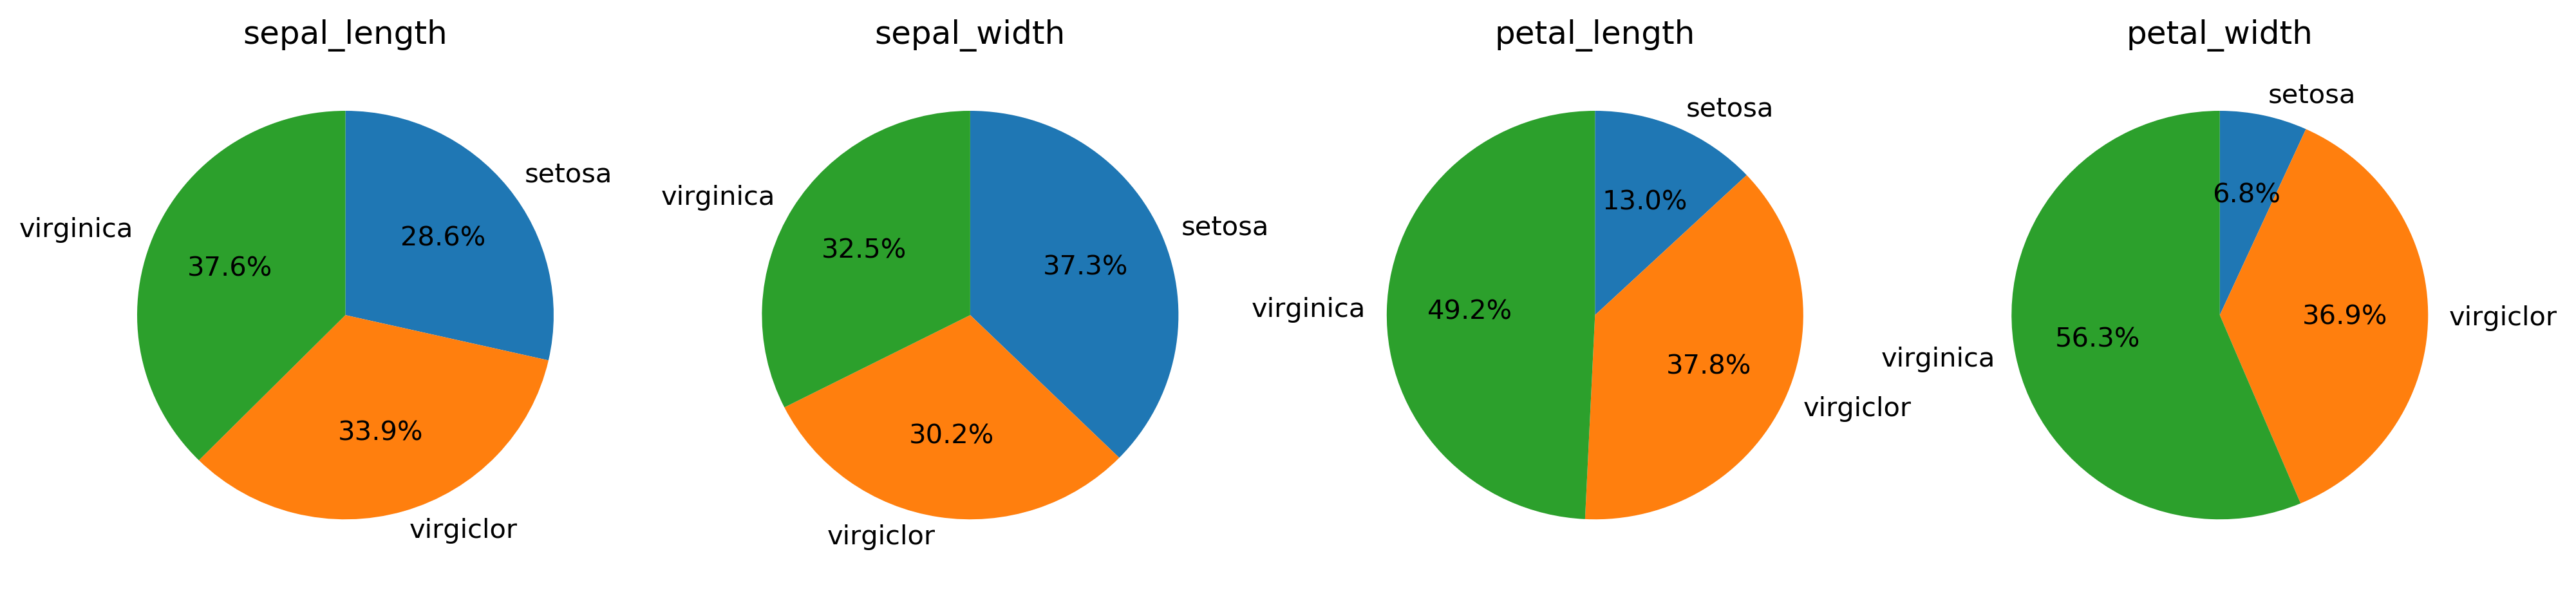

In [17]:
#1行 × 4列のグラフを設定
row = 1
col  = 4

plt.figure(figsize=(16, 3.5), dpi=300)

# 「sepal_length」のラベルごとのサンプル数
plt.subplot(row, col, 1)
plt.title('sepal_length')
plt.pie(df.groupby('Species').sum().loc[:,'sepal_length'], labels=['setosa', 'virgiclor', 'virginica'], counterclock=False, startangle=90, autopct="%1.1f%%")

# 「sepal_width」のラベルごとのサンプル数
plt.subplot(row, col, 2)
plt.title('sepal_width')
plt.pie(df.groupby('Species').sum().loc[:,'sepal_width'], labels=['setosa', 'virgiclor', 'virginica'], counterclock=False, startangle=90, autopct="%1.1f%%")

# 「petal_length」のラベルごとのサンプル数
plt.subplot(row, col, 3)
plt.title('petal_length')
plt.pie(df.groupby('Species').sum().loc[:,'petal_length'], labels=['setosa', 'virgiclor', 'virginica'], counterclock=False, startangle=90, autopct="%1.1f%%")

# 「petal_width」のラベルごとのサンプル数
plt.subplot(row, col, 4)
plt.title('petal_width')
plt.pie(df.groupby('Species').sum().loc[:,'petal_width'], labels=['setosa', 'virgiclor', 'virginica'], counterclock=False, startangle=90, autopct="%1.1f%%")

#グラフを表示
plt.show()

## 特徴量を一つずつ選び、箱ひげ図を使ってラベルごとのデータの分布を可視化する

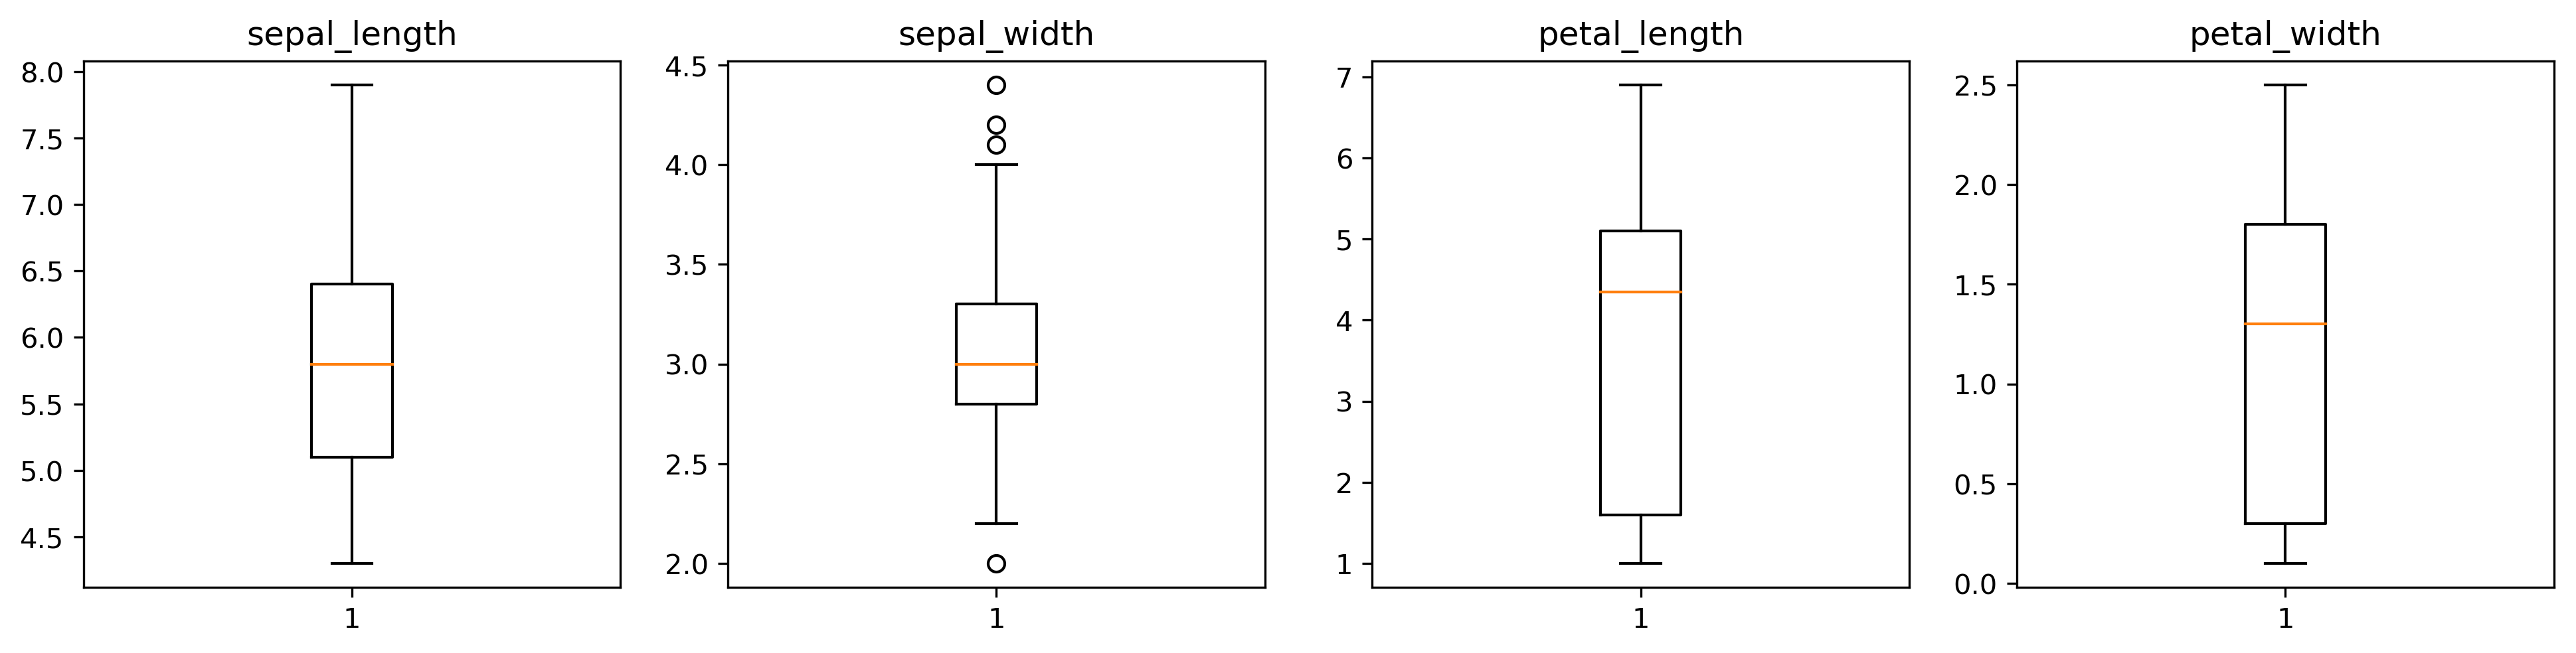

In [18]:
#1行 × 4列のグラフを設定
row = 1
col  = 4

plt.figure(figsize=(16, 3.5), dpi=300)

# 「sepal_length」の箱ひげ図
plt.subplot(row, col, 1)
plt.title('sepal_length')
plt.boxplot(df['sepal_length'])

# 「sepal_width」の箱ひげ図
plt.subplot(row, col, 2)
plt.title('sepal_width')
plt.boxplot(df['sepal_width'])

# 「petal_length」の箱ひげ図
plt.subplot(row, col, 3)
plt.title('petal_length')
plt.boxplot(df['petal_length'])

# 「petal_width」の箱ひげ図
plt.subplot(row, col, 4)
plt.title('petal_width')
plt.boxplot(df['petal_width'])

#グラフを表示
plt.show()

## 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

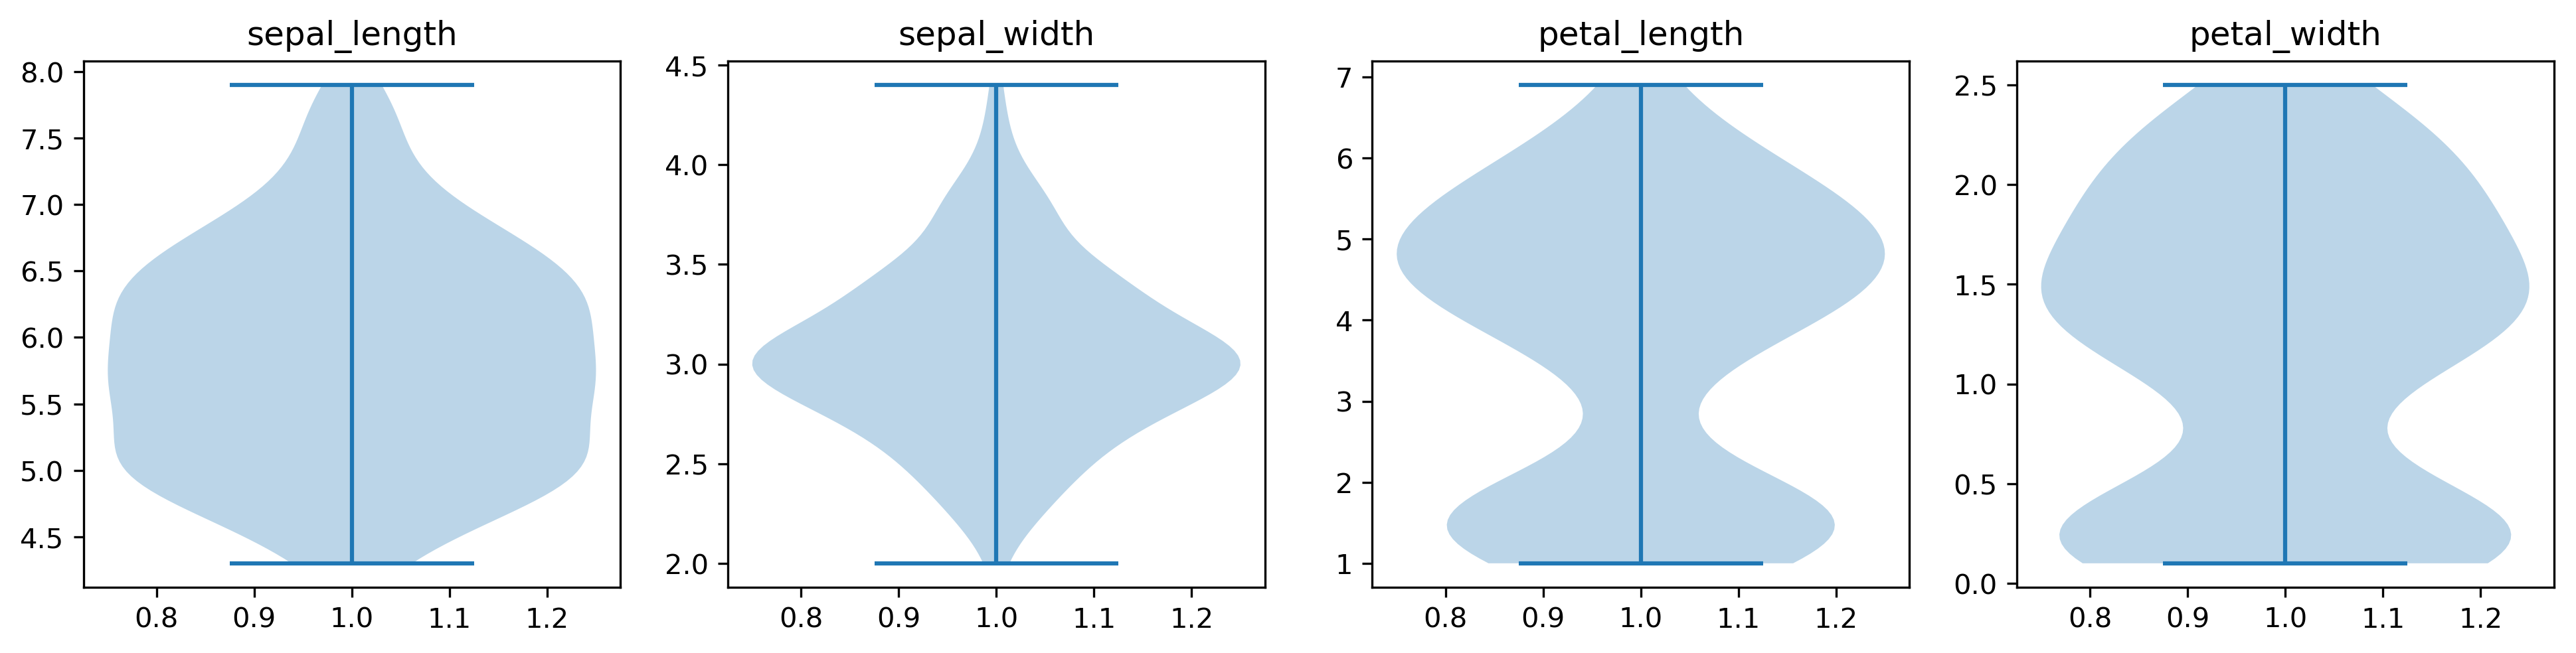

In [19]:
#1行 × 4列のグラフを設定
row = 1
col  = 4

plt.figure(figsize=(16, 3.5), dpi=300)

# 「sepal_length」のバイオリン図
plt.subplot(row, col, 1)
plt.title('sepal_length')
plt.violinplot(df['sepal_length'])

# 「sepal_width」のバイオリン図
plt.subplot(row, col, 2)
plt.title('sepal_width')
plt.violinplot(df['sepal_width'])

# 「petal_length」のバイオリン図
plt.subplot(row, col, 3)
plt.title('petal_length')
plt.violinplot(df['petal_length'])

# 「petal_width」のバイオリン図
plt.subplot(row, col, 4)
plt.title('petal_width')
plt.violinplot(df['petal_width'])

#グラフを表示
plt.show()

## 「箱ひげ図」と「バイオリン図」の各々の「相違点」と「利点」

「箱ひげ図」には平均/中央値と四分位範囲という要約統計量のみが含まれるのに対し、「バイオリン図」にはすべての分布データが含まれる。  
「箱ひげ図」はデータの四分位点、中央値、最大値、最小値が直観的にわかる。  
「バイオリン図」は分布の形状が「箱ひげ図」よりも直観的にわかる。

# 【問題7】特徴量間の関係の確認

## 縦軸と横軸に特徴量を１つずつ取り、種類毎に色分けした散布図を作る

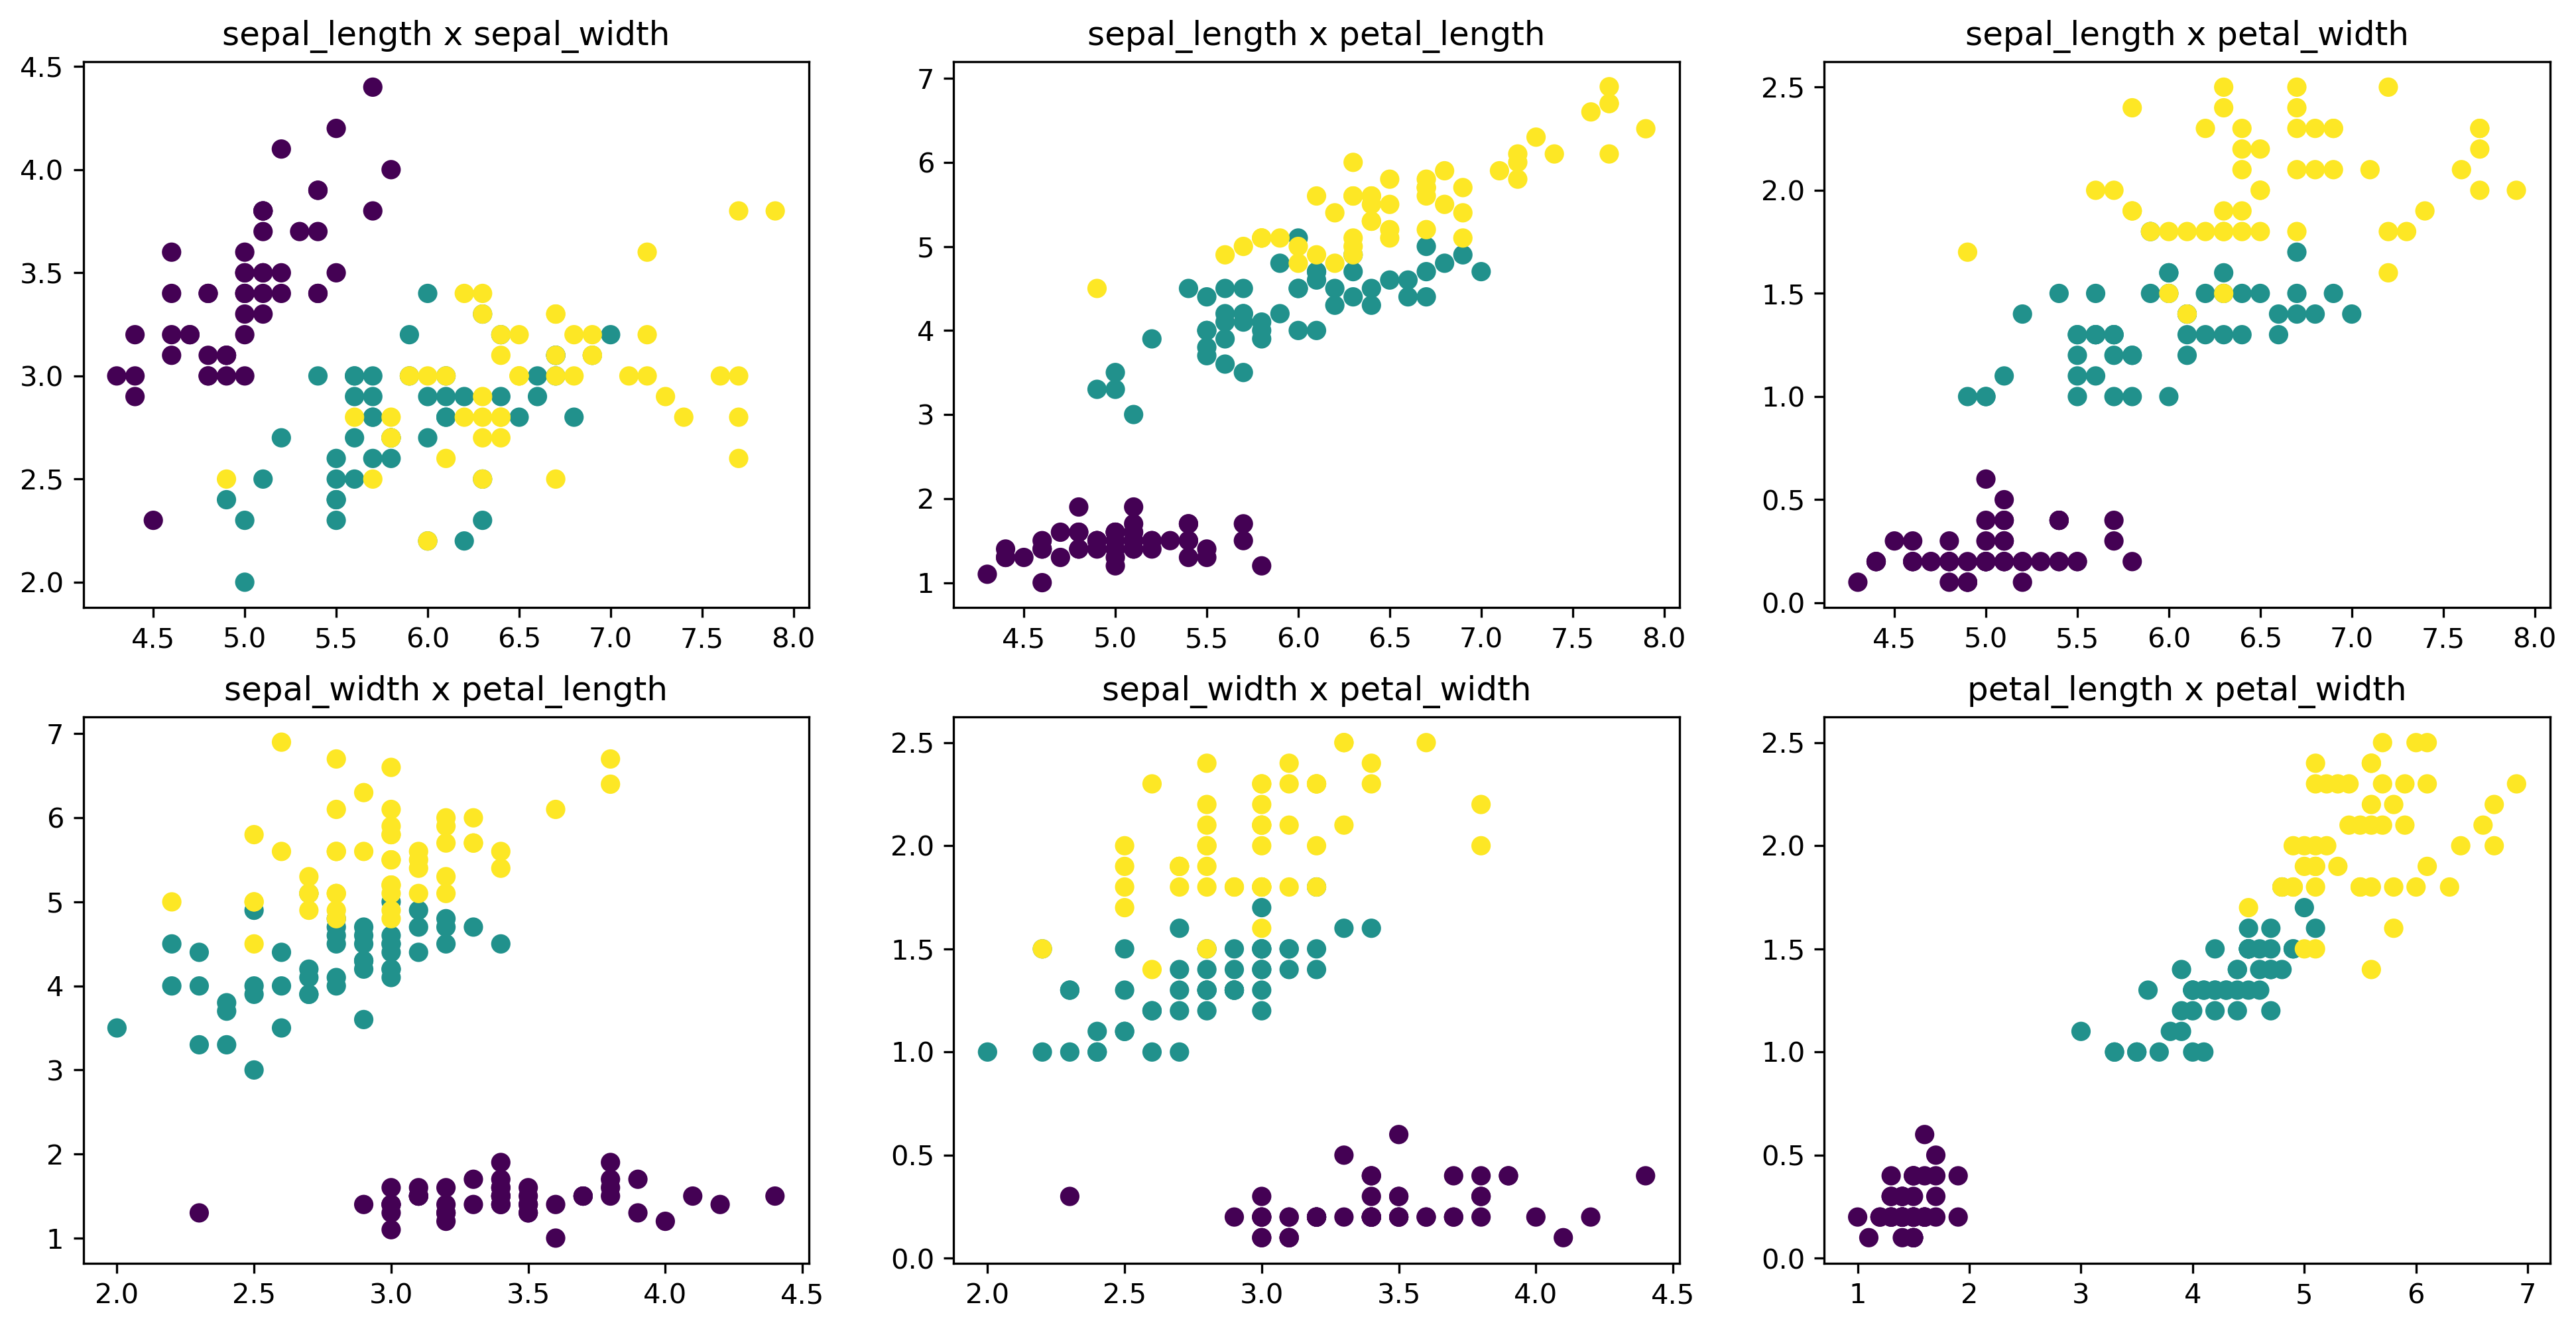

In [20]:
#2行 × 3列のグラフを設定
row = 2
col  = 3

plt.figure(figsize=(16, 8), dpi=300)

# 縦軸「sepal_length」　横軸「sepal_width」
plt.subplot(row, col, 1)
plt.title('sepal_length x sepal_width')
plt.scatter(df['sepal_length'], df['sepal_width'], c=iris.target)

# 縦軸「sepal_length」　横軸「petal_length」
plt.subplot(row, col, 2)
plt.title('sepal_length x petal_length')
plt.scatter(df['sepal_length'], df['petal_length'], c=iris.target)

# 縦軸「sepal_length」　横軸「petal_width」
plt.subplot(row, col, 3)
plt.title('sepal_length x petal_width')
plt.scatter(df['sepal_length'], df['petal_width'], c=iris.target)

# 縦軸「sepal_width」　横軸「petal_length」
plt.subplot(row, col, 4)
plt.title('sepal_width x petal_length')
plt.scatter(df['sepal_width'], df['petal_length'], c=iris.target)

# 縦軸「sepal_width」　横軸「petal_width」
plt.subplot(row, col, 5)
plt.title('sepal_width x petal_width')
plt.scatter(df['sepal_width'], df['petal_width'], c=iris.target)

# 縦軸「petal_length」　横軸「petal_width」
plt.subplot(row, col, 6)
plt.title('petal_length x petal_width')
plt.scatter(df['petal_length'], df['petal_width'], c=iris.target)

## 全ての組み合わせの散布図を一度に表示させる、散布図行列を作る

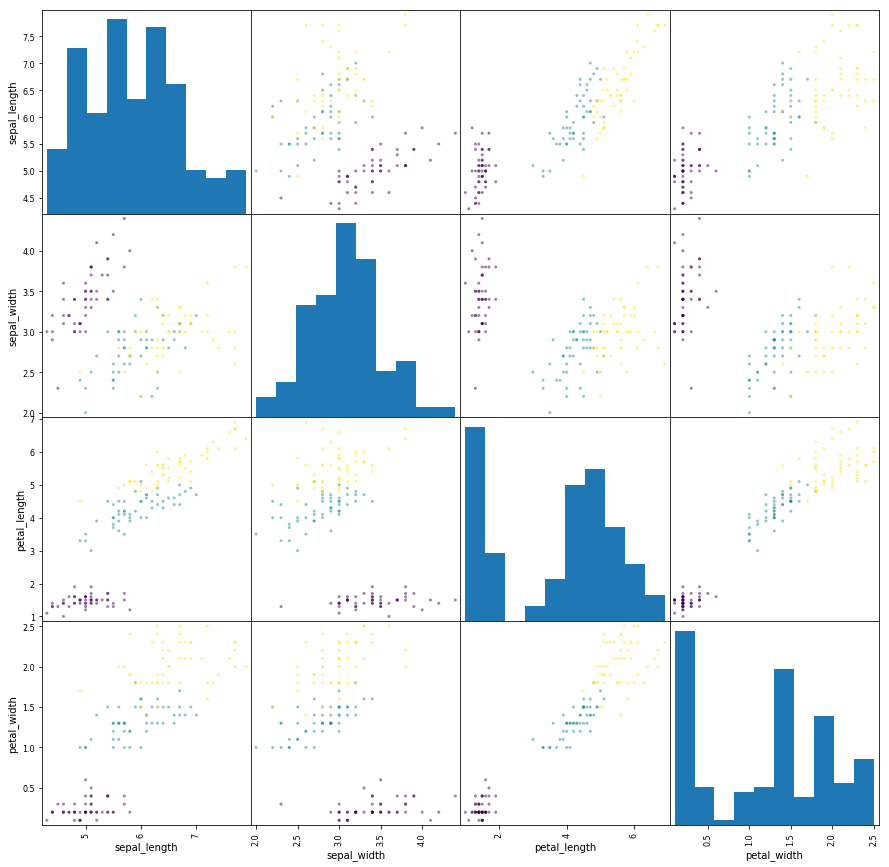

In [21]:
pd.plotting.scatter_matrix(df.iloc[:,:4], figsize=(15, 15), c=iris.target)
plt.show()

## ４つの特徴量に関する相関係数行列を作る

In [22]:
corr_df = df.iloc[:,:4].corr(method='pearson')
corr_df

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


## 相関係数行列のヒートマップを作る

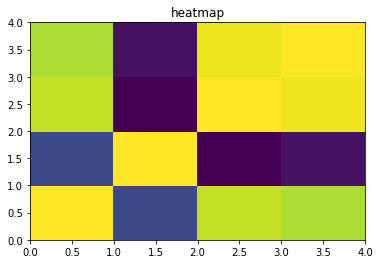

In [23]:
plt.title("heatmap")
plt.pcolor(corr_df)
plt.show()

# 【問題8】可視化したグラフや表の結果の説明

「相関係数行列」より「petal_width」と「petal_length」の相関係数が「0.962757」で最も相関関係が高いと分かる。
この「petal_width」と「petal_length」の「散布図」を見ると対角線上に綺麗に点が並んでいて相関関係が高いと視覚的に分かる。